In [59]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2


# add path of import
import sys
my_path = r'C:\Users\utente\Documents\GitHub\Project1_ML'
sys.path.insert(0,my_path + r'\code\COMMON')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from build_poly import build_poly
from standard import standardize 
from optimize_hyperparams import *

# number of samples in the dataset
num_data = 100

# features
x = np.linspace(0.1, 2 * np.pi, num_data)

# observations
offset = 1
noiseLevel = 0.1
y = np.sin(x) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x_std, mean_x, std_x = standardize(x)

# polynomial basis function
degree = 15
tx = build_poly(x_std[:, None], degree)

print(x_std.shape)
print(tx.shape)
print(y.shape)

(100,)
(100, 16)
(100,)


tr_LOSS: 0.00377027007894
te_LOSS: 0.0696322586756


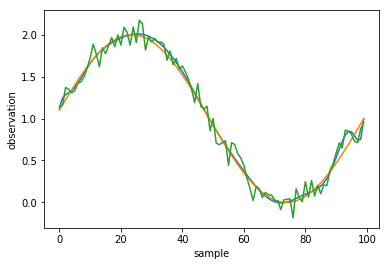

In [61]:
from implementations import least_squares

wls, loss = least_squares(y, tx)

print("tr_LOSS:" , loss)
#print("te_LOSS:" , np.mean(np.abs(np.sin(x)+offset-tx.dot(wls))))
print("te_LOSS:" , np.mean(np.abs(y-tx.dot(wls))))


# plot results
plt.figure()
plt.plot(tx.dot(wls))
plt.plot(np.sin(x)+offset)
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

tr_LOSS: 0.0162034533341
te_LOSS: 0.0689766179541


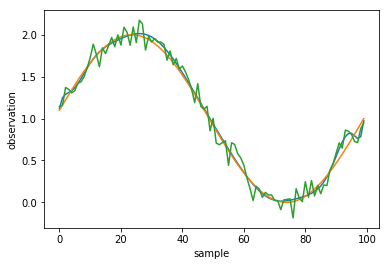

In [67]:
from implementations import ridge_regression

lambda_ = 0.001
wrr, loss = ridge_regression(y, tx, lambda_)

print("tr_LOSS:" , loss)
#print("te_LOSS:" , np.mean(np.abs(np.sin(x)+offset-tx.dot(wrr))))
print("te_LOSS:" , np.mean(np.abs(y-tx.dot(wrr))))


# plot results
plt.figure()
plt.plot(tx.dot(wrr))
plt.plot(np.sin(x)+offset)
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

LOSS :  0.282675892174
0.0
LOSS :  0.174670316911
0.0
0.0
0.228673104543


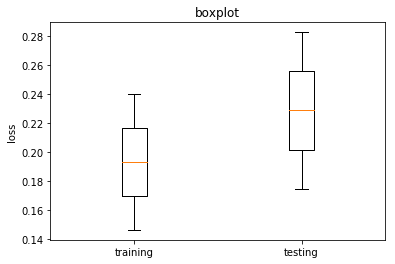

In [72]:
# parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 2
arg_rr['lambda_'] = 0.001

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot, success_rate = cross_validation(y, tx, arg_rr)

# optimal weights minimize the testing error
# w_opt = w_tr_tot[np.argmin(loss_te_tot)] ----> USELESS do i need the weights here!?

print(success_rate)
print(np.mean(loss_te_tot))

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

tested lambda_:  [  1.00000000e-10   1.88739182e-10   3.56224789e-10   6.72335754e-10
   1.26896100e-09   2.39502662e-09   4.52035366e-09   8.53167852e-09
   1.61026203e-08   3.03919538e-08   5.73615251e-08   1.08263673e-07
   2.04335972e-07   3.85662042e-07   7.27895384e-07   1.37382380e-06
   2.59294380e-06   4.89390092e-06   9.23670857e-06   1.74332882e-05
   3.29034456e-05   6.21016942e-05   1.17210230e-04   2.21221629e-04
   4.17531894e-04   7.88046282e-04   1.48735211e-03   2.80721620e-03
   5.29831691e-03   1.00000000e-02] 

------------------------------------------ cross validation with lambda_ =  1e-10
LOSS :  0.602972095144
0.0
LOSS :  0.131468798187
0.0
------------------------------------------ cross validation with lambda_ =  1.88739182214e-10
LOSS :  0.60296334864
0.0
LOSS :  0.131469603535
0.0
------------------------------------------ cross validation with lambda_ =  3.56224789026e-10
LOSS :  0.602946788607
0.0
LOSS :  0.13147111135
0.0
--------------------------------

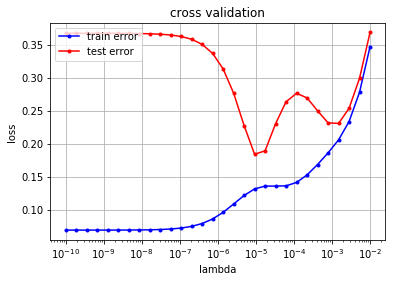

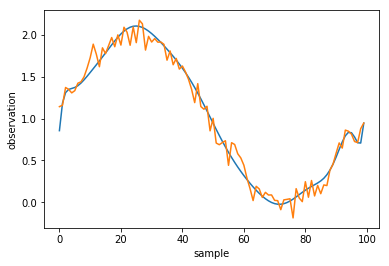

In [76]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 2

# build polynomial basis with the optimal degree
#phi_opt = build_poly(x[:,None], degree)

# optimization parameters
lambda_min = -10
lambda_max = -2
lambda_steps = 30

# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, tx, lambda_min, lambda_max, lambda_steps, arg_rr, debug_mode=1)

# plot results
plt.figure()
plt.plot(tx.dot(w_opt))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()